# Visualização

As tabelas de dados (`DataFrame`) da biblioteca [pandas](https://pandas.pydata.org/) permitem que conjuntos de dados sejam estruturados e visualizados numa forma tabelada. No entanto, em muitas situações, visualizações gráficas são mais apelativas, claras e interpretáveis.

Em Python, a biblioteca [matplotlib](https://matplotlib.org/) é a mais usada para visualização gráfica:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import numpy as np

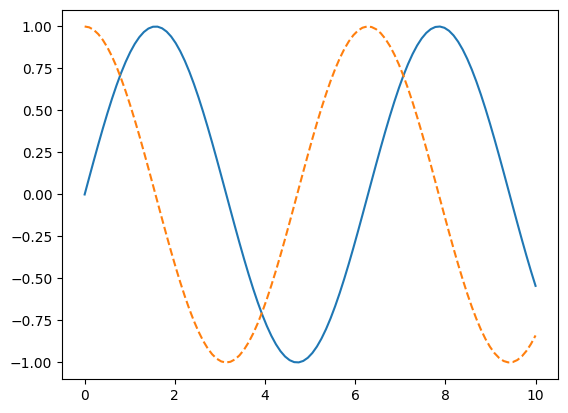

In [3]:
x = np.linspace(0, 10, 100)

fig = plt.figure()
plt.plot(x, np.sin(x), '-')
plt.plot(x, np.cos(x), '--');

**Nota**: O `;` no final da instrução é algo estranho em Python, mas não é um erro. Neste caso, serve apenas para que o retorno da função não seja mostrado no notebook.

Apesar de a biblioteca *matplotlib* poder ser usada para gerar a maioria das visualizações de dados de interesse, esta nāo está preparada para lidar diretamente com as estruturas de dados da biblioteca *pandas*, o que torna o processo de geração das visualizações bastante moroso. Para lidar com esta limitação, a biblioteca *pandas* implementa alguns métodos de visualização básicos. A biblioteca [Seaborn](http://seaborn.pydata.org/), para além dos básicos, implementa alguns métodos para gerar visualizações mais complexas, mas que são bastante úteis no contexto da análise de dados.

**Nota**: Quer os métodos de visualização da biblioteca *pandas*, quer a biblioteca *Seaborn* são construídos em cima da biblioteca *matplotlib*.

**Nota**: Neste tutorial não se pretende explorar ao detalhe como gerar cada tipo de visualização, mas sim mostrar algumas visões possíveis sobre os dados.

## pandas plot

Para explorar os métodos de visualização da biblioteca *pandas* vamos carregar o conjunto de dados de filmes que processamos anteriormente:

In [4]:
import pandas as pd
import os

data_path = '../data/' if os.path.exists('../data/') else 'https://raw.githubusercontent.com/TheAwesomeGe/DECD/main/data/'

movies_df = pd.read_csv(data_path + 'IMDB-Movie-Data-Processed.csv', index_col='Title')
movies_df.head()

,genre,director,year,runtime,rating,votes,revenue_millions,metascore,rating_category,rating_difference
Title,,,,,,,,,,
Guardians of the Galaxy,"Action,Adventure,Sci-Fi",James Gunn,2014,121,8.1,757074,333.13,76.0,good,0.5
Prometheus,"Adventure,Mystery,Sci-Fi",Ridley Scott,2012,124,7.0,485820,126.46,65.0,bad,0.5
Split,"Horror,Thriller",M. Night Shyamalan,2016,117,7.3,157606,138.12,62.0,bad,1.1
Sing,"Animation,Comedy,Family",Christophe Lourdelet,2016,108,7.2,60545,270.32,59.0,bad,1.3
Suicide Squad,"Action,Adventure,Fantasy",David Ayer,2016,123,6.2,393727,325.02,40.0,bad,2.2


O principal método para visualização fornecido pela biblioteca *pandas* é o método `plot`. Este recebe um argumento `kind` que define o tipo de gráfico. Por exemplo:

- `'line'`: gráfico de linha
- `'bar'` e `'barh'`: gráficos de barras (verticais ou horizontais)
- `'pie'`: gráfico de pizza
- `'hist'`: histograma
- `'density'`: densidade de probabilidade
- `'scatter'`: gráfico de dispersão
- `'box'`: diagrama de caixa

Para começar, vamos observar a relação entre a classificação dos filmes e a sua receita usando um gráfico de dispersão:

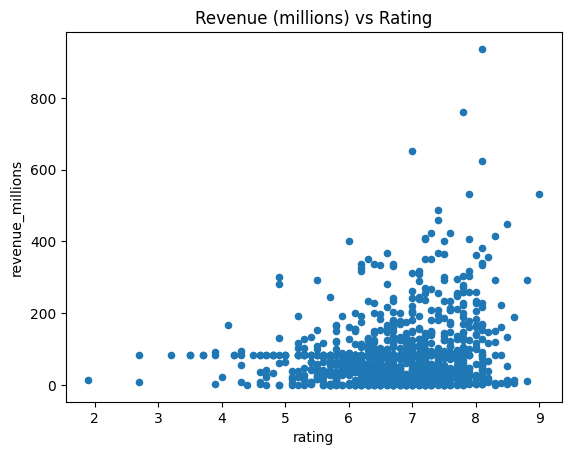

In [5]:
movies_df.plot(kind='scatter', x='rating', y='revenue_millions', title='Revenue (millions) vs Rating');

O método `plot` também pode ser aplicado sobre uma série. Por exemplo, para obter um histograma das classificações dos filmes:

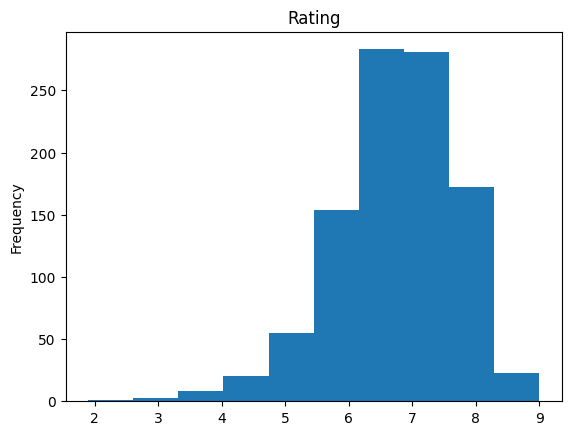

In [9]:
movies_df['rating'].plot(kind='hist', title='Rating');

Anteriormente, usámos o método `describe` para obter um resumo da distribuição dos valores dum atributo:

In [11]:
movies_df['rating'].describe()

count    1000.000000
mean        6.723200
std         0.945429
min         1.900000
25%         6.200000
50%         6.800000
75%         7.400000
max         9.000000
Name: rating, dtype: float64

Uma representação gráfica desta informação pode ser obtida usando um diagrama de caixa:

![diagrama de caixa](../images/boxplot.svg)

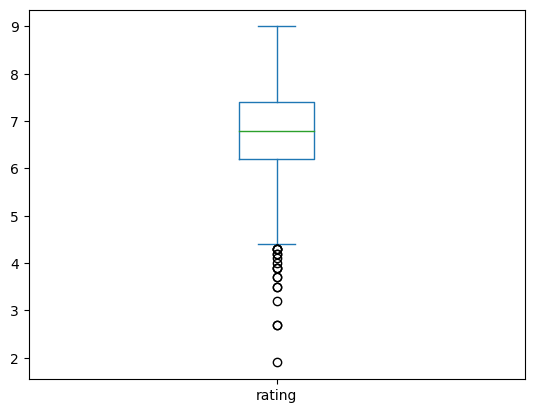

In [12]:
movies_df['rating'].plot(kind='box');

Neste contexto, a biblioteca *pandas* disponibiliza outro método, `boxplot`, que pode ser aplicado sobre uma tabela de dados para obter uma visualização da distribuição dum atributo contínuo na forma de diagramas de caixa. 


By combining categorical and continuous data, we can create a Boxplot of revenue that is grouped by the Rating Category we created above:

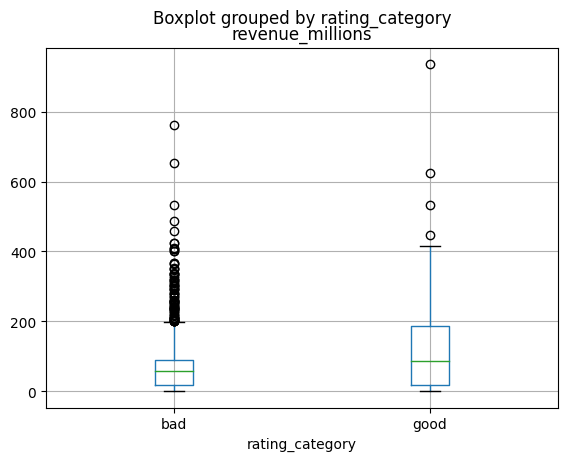

In [17]:
movies_df.boxplot(column='revenue_millions', by='rating_category');

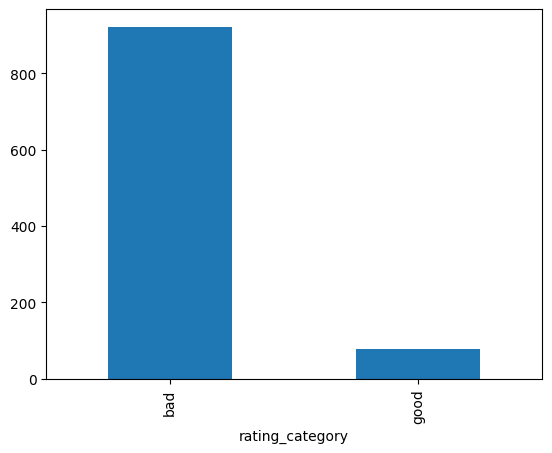

In [23]:
movies_df['rating_category'].value_counts().plot(kind='bar');

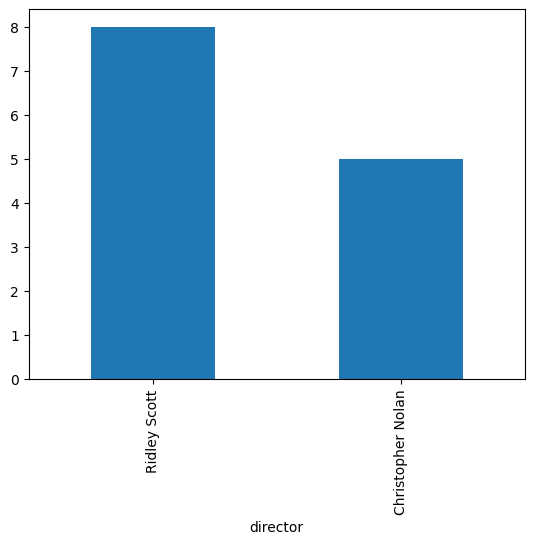

In [11]:
movies_df['director'][movies_df['director'].isin(['Christopher Nolan', 'Ridley Scott'])].value_counts().plot(kind='bar');

In [ ]:
**Side note:**
For categorical variables utilize Bar Charts and Boxplots.  For continuous variables utilize Histograms, Scatterplots, Line graphs, and Boxplots.

That's the general idea of plotting with pandas. There's too many plots to mention, so definitely take a look at the `plot()` [docs here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html) for more information on what it can do.

## Seaborn

An answer to these problems is [Seaborn](http://seaborn.pydata.org/). Seaborn provides an API on top of Matplotlib that offers sane choices for plot style and color defaults, defines simple high-level functions for common statistical plot types, and integrates with the functionality provided by Pandas.

To be fair, the Matplotlib team has adapted to the changing landscape: it added the `plt.style` tools discussed in [Customizing Matplotlib: Configurations and Style Sheets](04.11-Settings-and-Stylesheets.ipynb), and Matplotlib is starting to handle Pandas data more seamlessly.
But for all the reasons just discussed, Seaborn remains a useful add-on.

By convention, Seaborn is often imported as `sns`:

In [33]:
import seaborn as sns
sns.set_theme()  # set the chart style



The main idea of Seaborn is that it provides high-level commands to create a variety of plot types useful for statistical data exploration, and even some statistical model fitting.

Let's take a look at a few of the datasets and plot types available in Seaborn. Note that all of the following *could* be done using raw Matplotlib commands (this is, in fact, what Seaborn does under the hood), but the Seaborn API is much more convenient.

### Histogramas e densidades

Often in statistical data visualization, all you want is to plot histograms and joint distributions of variables.
We have seen that this is relatively straightforward in Matplotlib (see the following figure):

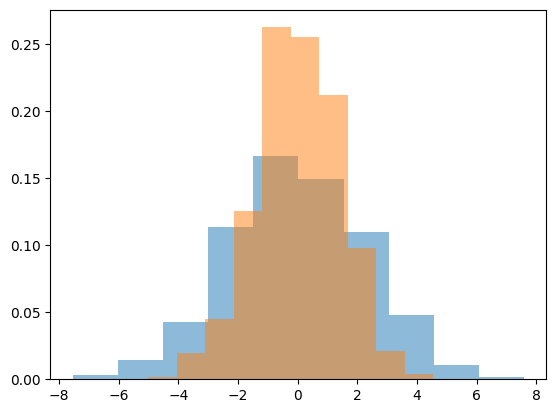

In [13]:
data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size=2000)
data = pd.DataFrame(data, columns=['x', 'y'])

for col in 'xy':
    plt.hist(data[col], density=True, alpha=0.5)

In [14]:
sns.histplot(data);

NameError: name 'sns' is not defined

Rather than just providing a histogram as a visual output, we can get a smooth estimate of the distribution using kernel density estimation (introduced in [Density and Contour Plots](04.04-Density-and-Contour-Plots.ipynb)), which Seaborn does with ``sns.kdeplot`` (see the following figure):

In [ ]:
sns.kdeplot(data=data, fill=True);

If we pass `x` and `y` columns to `kdeplot`, we instead get a two-dimensional visualization of the joint density (see the following figure):

In [ ]:
sns.kdeplot(data=data, x='x', y='y');

We can see the joint distribution and the marginal distributions together using `sns.jointplot`, which we'll explore further later in this chapter.

### Gráficos de pares

When you generalize joint plots to datasets of larger dimensions, you end up with *pair plots*. These are very useful for exploring correlations between multidimensional data, when you'd like to plot all pairs of values against each other.

We'll demo this with the well-known Iris dataset, which lists measurements of petals and sepals of three Iris species:

In [ ]:
iris = sns.load_dataset("iris")
iris.head()

Visualizing the multidimensional relationships among the samples is as easy as calling ``sns.pairplot`` (see the following figure):

In [ ]:
sns.pairplot(iris, hue='species', height=2.5);

### Histogramas segmentados

Sometimes the best way to view data is via histograms of subsets, as shown in the following figure. Seaborn's `FacetGrid` makes this simple.
We'll take a look at some data that shows the amount that restaurant staff receive in tips based on various indicator data:[^1]

[^1]: The restaurant staff data used in this section divides employees into two sexes: female and male. Biological sex
isn’t binary, but the following discussion and visualizations are limited by this data.

In [ ]:
tips = sns.load_dataset('tips')
tips.head()

In [ ]:
tips['tip_pct'] = 100 * tips['tip'] / tips['total_bill']

grid = sns.FacetGrid(tips, row="sex", col="time", margin_titles=True)
grid.map(plt.hist, "tip_pct", bins=np.linspace(0, 40, 15));

The faceted chart gives us some quick insights into the dataset: for example, we see that it contains far more data on male servers during the dinner hour than other categories, and typical tip amounts appear to range from approximately 10% to 20%, with some outliers on either end.

### Gráficos categóricos

Categorical plots can be useful for this kind of visualization as well. These allow you to view the distribution of a parameter within bins defined by any other parameter, as shown in the following figure:

In [ ]:
with sns.axes_style(style='ticks'):
    g = sns.catplot(x="day", y="total_bill", hue="sex", data=tips, kind="box")
    g.set_axis_labels("Day", "Total Bill");

### Distribuição conjunta

Similar to the pair plot we saw earlier, we can use `sns.jointplot` to show the joint distribution between different datasets, along with the associated marginal distributions (see the following figure):

In [ ]:
with sns.axes_style('white'):
    sns.jointplot(x="total_bill", y="tip", data=tips, kind='hex')

The joint plot can even do some automatic kernel density estimation and regression, as shown in the following figure:

In [ ]:
sns.jointplot(x="total_bill", y="tip", data=tips, kind='reg');

### Gráficos de barras

Time series can be plotted using `sns.factorplot`. In the following example, we'll use the Planets dataset that we first saw in [Aggregation and Grouping](03.08-Aggregation-and-Grouping.ipynb); see the following figure for the result:

In [ ]:
planets = sns.load_dataset('planets')
planets.head()

In [ ]:
with sns.axes_style('white'):
    g = sns.catplot(x="year", data=planets, aspect=2,
                    kind="count", color='steelblue')
    g.set_xticklabels(step=5)

We can learn more by looking at the *method* of discovery of each of these planets (see the following figure):

In [ ]:
with sns.axes_style('white'):
    g = sns.catplot(x="year", data=planets, aspect=4.0, kind='count',
                    hue='method', order=range(2001, 2015))
    g.set_ylabels('Number of Planets Discovered')

For more information on plotting with Seaborn, see the [Seaborn documentation](http://seaborn.pydata.org/), and particularly the [example gallery](https://seaborn.pydata.org/examples/index.html).